In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers

In [2]:
df=pd.read_csv('F:\All_Certificates\Artificial_Intelligence\Machine learning\DeepLearning\Admission_Predict_Ver1.1.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.drop(columns='Serial No.',inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [12]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
df.shape

(500, 8)

In [15]:
df.duplicated().sum()

0

In [19]:
#Split the data intp X & Y
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [24]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [27]:
# Scale the Data

Sc=MinMaxScaler()

X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)

In [43]:
#Initiliaze the Model

model=keras.Sequential([

    layers.Dense(7,activation='relu',input_shape=[X_train.shape[1]]),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 32)                256       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer="adam",loss='mean_squared_error')

In [46]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 67ms/step - loss: 0.0763 - val_loss: 0.0753
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0556 - val_loss: 0.0548
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0400 - val_loss: 0.0380
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.0237
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0100 - val_loss: 0.0106
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0098 - val_loss: 0.0101
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.0091
Epo

In [47]:
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7271647111110966

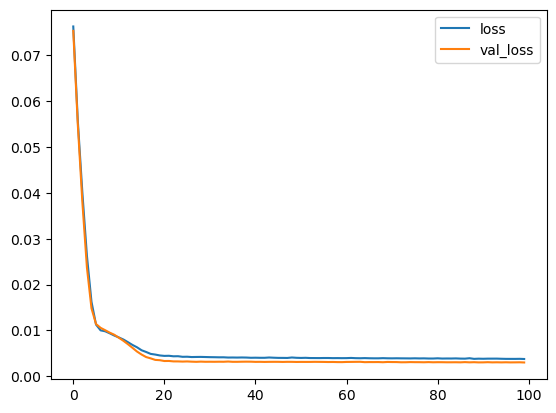

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()